In [ ]:
# Atividade 3 - Ciência de Dados
# Autor: [Marcelo Sampaio]
# Objetivo: Limpeza, tratamento e exploração inicial da base atividade3_dataset.csv

In [51]:
# ============================
# 1. LEITURA E INSPEÇÃO
# ============================


# --- Importação de bibliotecas ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# --- Conectando ao Google Drive (para Google Colab) ---
from google.colab import drive
drive.mount('/content/drive')


# Defina o caminho para o arquivo CSV no Google Drive
caminho_arquivo = '/content/drive/MyDrive/Atividade3/atividade3_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# --- Leitura da base de dados ---
df = pd.read_csv(caminho_arquivo, sep=';')

In [54]:
# --- Visualizando as 5 primeiras linhas ---
print("Pré-visualização da base:")
print(df.head())

Pré-visualização da base:
   ID     Nome  Idade          Cidade   Produto    Preço  Quantidade  \
0   1  Mariana   48.0       FORTALEZA    Tablet  2010,87           7   
1   2    Bruno   42.0  RIO DE JANEIRO   Teclado      NaN           6   
2   3      Ana   54.0  RIO DE JANEIRO   Monitor  3619.29           2   
3   4   Carlos   62.0        CURITIBA   Teclado  40415.9           8   
4   5  Mariana   60.0        CURITIBA  Notebook   716.66           8   

  Data_Compra  
0  30-05-2024  
1  12-04-2025  
2  10-12-2022  
3  31-12-2022  
4  14-09-2023  


In [55]:
# --- Informações gerais sobre os tipos de dados ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           510 non-null    int64  
 1   Nome         510 non-null    object 
 2   Idade        489 non-null    float64
 3   Cidade       510 non-null    object 
 4   Produto      510 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   510 non-null    int64  
 7   Data_Compra  510 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ KB


In [56]:
# --- Verificando quantidade de valores nulos ---
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64


In [57]:
# --- Verificando duplicados ---
print("\nQuantidade de linhas duplicadas:", df.duplicated().sum())


Quantidade de linhas duplicadas: 8


In [58]:
# ============================
# 3. TRATAMENTO DE VALORES AUSENTES
# ============================


# --- Estratégia de tratamento de valores ausentes ---
# Para colunas numéricas: preencher com a média.
# Para colunas categóricas: preencher com a moda.
# Para colunas textuais sem relevância: preencher com "Desconhecido".
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Atribui o resultado de volta à coluna, sem usar inplace=True
        df[col] = df[col].fillna(df[col].mean())
    else:
        # Atribui o resultado de volta para o DataFrame
        df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Desconhecido')

In [59]:
# ============================

# 4. DETECÇÃO E REMOÇÃO DE DUPLICADOS

# ============================



# --- Contando linhas duplicadas ---

duplicados = df.duplicated().sum()

print(f"Linhas duplicadas removidas: {duplicados}")
# --- Removendo duplicados ---

df = df.drop_duplicates()

Linhas duplicadas removidas: 8


In [60]:
# ============================

# 5. CORREÇÕES ADICIONAIS

# ============================

# --- Padronização de valores inconsistentes ---

if 'Estado' in df.columns:
  df['Estado'] = df['Estado'].str.strip().str.upper().replace({
  'SÃO PAULO': 'SP',
  'SP ': 'SP',
  'RIO DE JANEIRO': 'RJ'
})



In [61]:
# --- Conversão de colunas de datas ---

for col in df.columns:
    if 'data' in col.lower():
        df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce')

In [62]:
# --- Conversão de números armazenados como texto ---

for col in df.columns:
  if df[col].dtype == 'object':
    try:
      df[col] = pd.to_numeric(df[col])
    except:
      pass

In [63]:
# ============================

# 6. EXPLORAÇÃO INICIAL APÓS LIMPEZA

# ============================

# --- Estatísticas descritivas ---

print("\nEstatísticas descritivas:")

print(df.describe(include='all'))


Estatísticas descritivas:
                ID      Nome       Idade        Cidade     Produto    Preço  \
count   502.000000       502  502.000000           502         502      502   
unique         NaN        10         NaN            16           7      465   
top            NaN  Fernanda         NaN  PORTO ALEGRE  Smartphone  1689.08   
freq           NaN        68         NaN            66          83       38   
mean    249.950199       NaN   44.317690           NaN         NaN      NaN   
min       1.000000       NaN   18.000000           NaN         NaN      NaN   
25%     125.250000       NaN   32.000000           NaN         NaN      NaN   
50%     249.500000       NaN   44.274029           NaN         NaN      NaN   
75%     374.750000       NaN   57.000000           NaN         NaN      NaN   
max     500.000000       NaN   70.000000           NaN         NaN      NaN   
std     144.481631       NaN   15.028173           NaN         NaN      NaN   

        Quantidade Data_

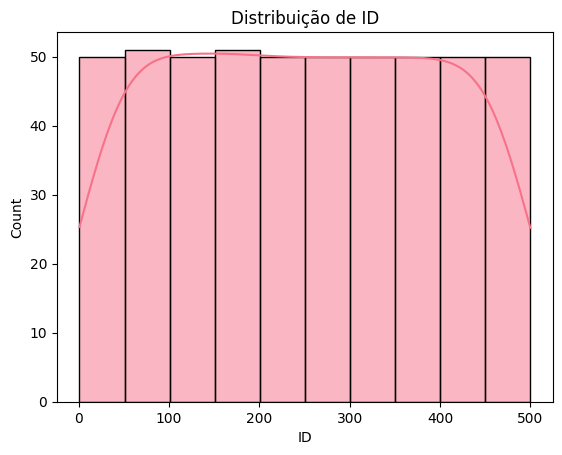

In [64]:
# --- Gráfico de distribuição ---

col_numerica = df.select_dtypes(include=['int64', 'float64']).columns[0]

sns.histplot(df[col_numerica], kde=True)

plt.title(f'Distribuição de {col_numerica}')

plt.show()

Plotando distribuição para a coluna: ID


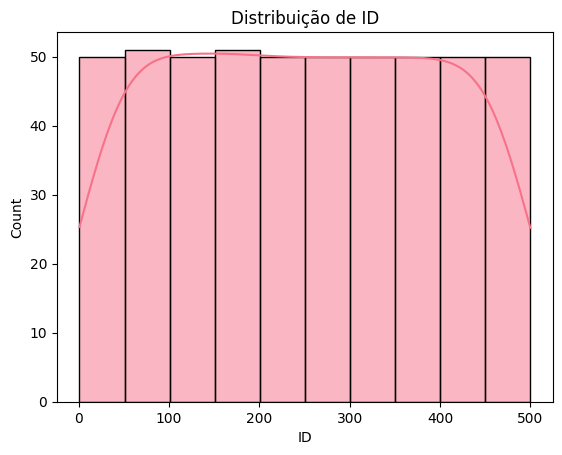

In [66]:
# --- Gráfico de distribuição ---
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Verifica se existe pelo menos uma coluna numérica
if not colunas_numericas.empty:
    col_numerica = colunas_numericas[0]
    print(f"Plotando distribuição para a coluna: {col_numerica}")
    sns.histplot(df[col_numerica], kde=True)
    plt.title(f'Distribuição de {col_numerica}')
    plt.show()
else:
    print("Nenhuma coluna numérica encontrada para plotar o gráfico de distribuição.")

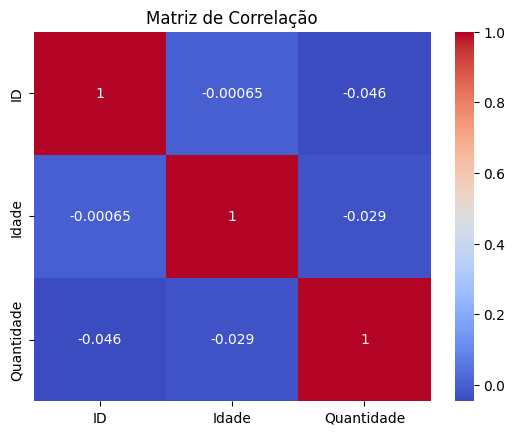

In [68]:
# --- Gráfico de correlação ---
# Também precisa de colunas numéricas, então vamos usar a mesma verificação
if not colunas_numericas.empty:
    sns.heatmap(df[colunas_numericas].corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()
else:
    print("Nenhuma coluna numérica encontrada para plotar a matriz de correlação.")

In [69]:
# ============================

# 7. CRIAÇÃO DE NOVA COLUNA DERIVADA

# ============================

# --- Criando coluna binária "Acima_da_Media" ---

df['Acima_da_Media'] = df[col_numerica] > df[col_numerica].mean()

In [70]:
# ============================

# 8. EXPORTAÇÃO DA BASE LIMPA

# ============================



# --- Exportando a base limpa ---

df.to_csv('/content/drive/MyDrive/base_limpa.csv', index=False)



print("Processo de limpeza concluído. Arquivo 'base_limpa.csv' gerado.")



Processo de limpeza concluído. Arquivo 'base_limpa.csv' gerado.
